# Fully Convolutional Network

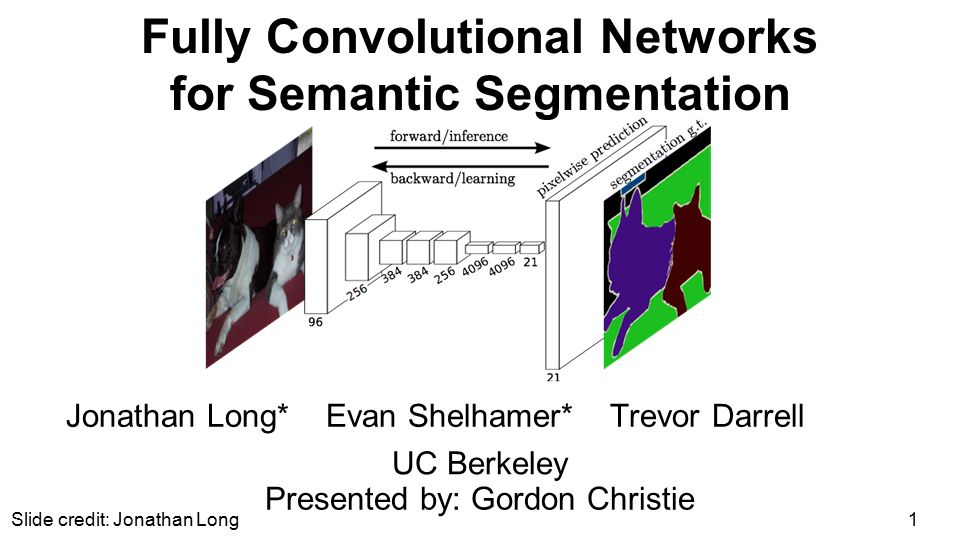

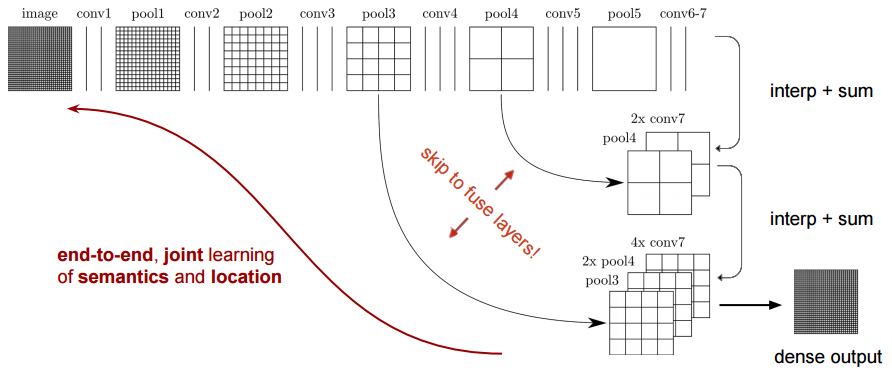

In [1]:
import os
import scipy as scp
import scipy.misc

import numpy as np
import tensorflow as tf

import fcn32_vgg
import utils

from tensorflow.python.framework import ops
import matplotlib.pyplot as plt
import math
%matplotlib inline

# Dataset
## Contains 4859 images and 2 classes

In [2]:
img1 = scp.misc.imread("./test_data/frame34.png")

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


In [3]:
with tf.Session() as sess:
    images = tf.placeholder("float")
    feed_dict = {images: img1}
    batch_images = tf.expand_dims(images, 0)
    
    vgg_fcn = fcn32_vgg.FCN32VGG()
    with tf.name_scope("content_vgg"):
        vgg_fcn.build(batch_images, debug=True, train=True)

    print('Finished building Network.')

    init = tf.global_variables_initializer()
    sess.run(init)
    saver=tf.train.Saver()
    print('Running the Network')
    tensors = [vgg_fcn.pred, vgg_fcn.pred_up,vgg_fcn.pool3,vgg_fcn.pool4,vgg_fcn.pool5]
    down, up, p3,p4,p5= sess.run(tensors, feed_dict=feed_dict)
    saver.save(sess, './Output/')
    writer=tf.summary.FileWriter('./train/',)
    summaries = tf.summary.merge_all()
    summ = sess.run(summaries,feed_dict=feed_dict)
    writer.add_summary(summ)

npy file loaded
Layer name: conv1_1
Layer shape: (3, 3, 3, 64)
Layer name: conv1_2
Layer shape: (3, 3, 64, 64)
Layer name: conv2_1
Layer shape: (3, 3, 64, 128)
Layer name: conv2_2
Layer shape: (3, 3, 128, 128)
Layer name: conv3_1
Layer shape: (3, 3, 128, 256)
Layer name: conv3_2
Layer shape: (3, 3, 256, 256)
Layer name: conv3_3
Layer shape: (3, 3, 256, 256)
Layer name: conv4_1
Layer shape: (3, 3, 256, 512)
Layer name: conv4_2
Layer shape: (3, 3, 512, 512)
Layer name: conv4_3
Layer shape: (3, 3, 512, 512)
Layer name: conv5_1
Layer shape: (3, 3, 512, 512)
Layer name: conv5_2
Layer shape: (3, 3, 512, 512)
Layer name: conv5_3
Layer shape: (3, 3, 512, 512)
Layer name: fc6
Layer shape: [7, 7, 512, 4096]
Layer name: fc7
Layer shape: [1, 1, 4096, 4096]
Layer name: fc8
Layer shape: [1, 1, 4096, 1000]
Finished building Network.
Running the Network


Shape of the activation is 22X39
Number of the filters learned 256


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


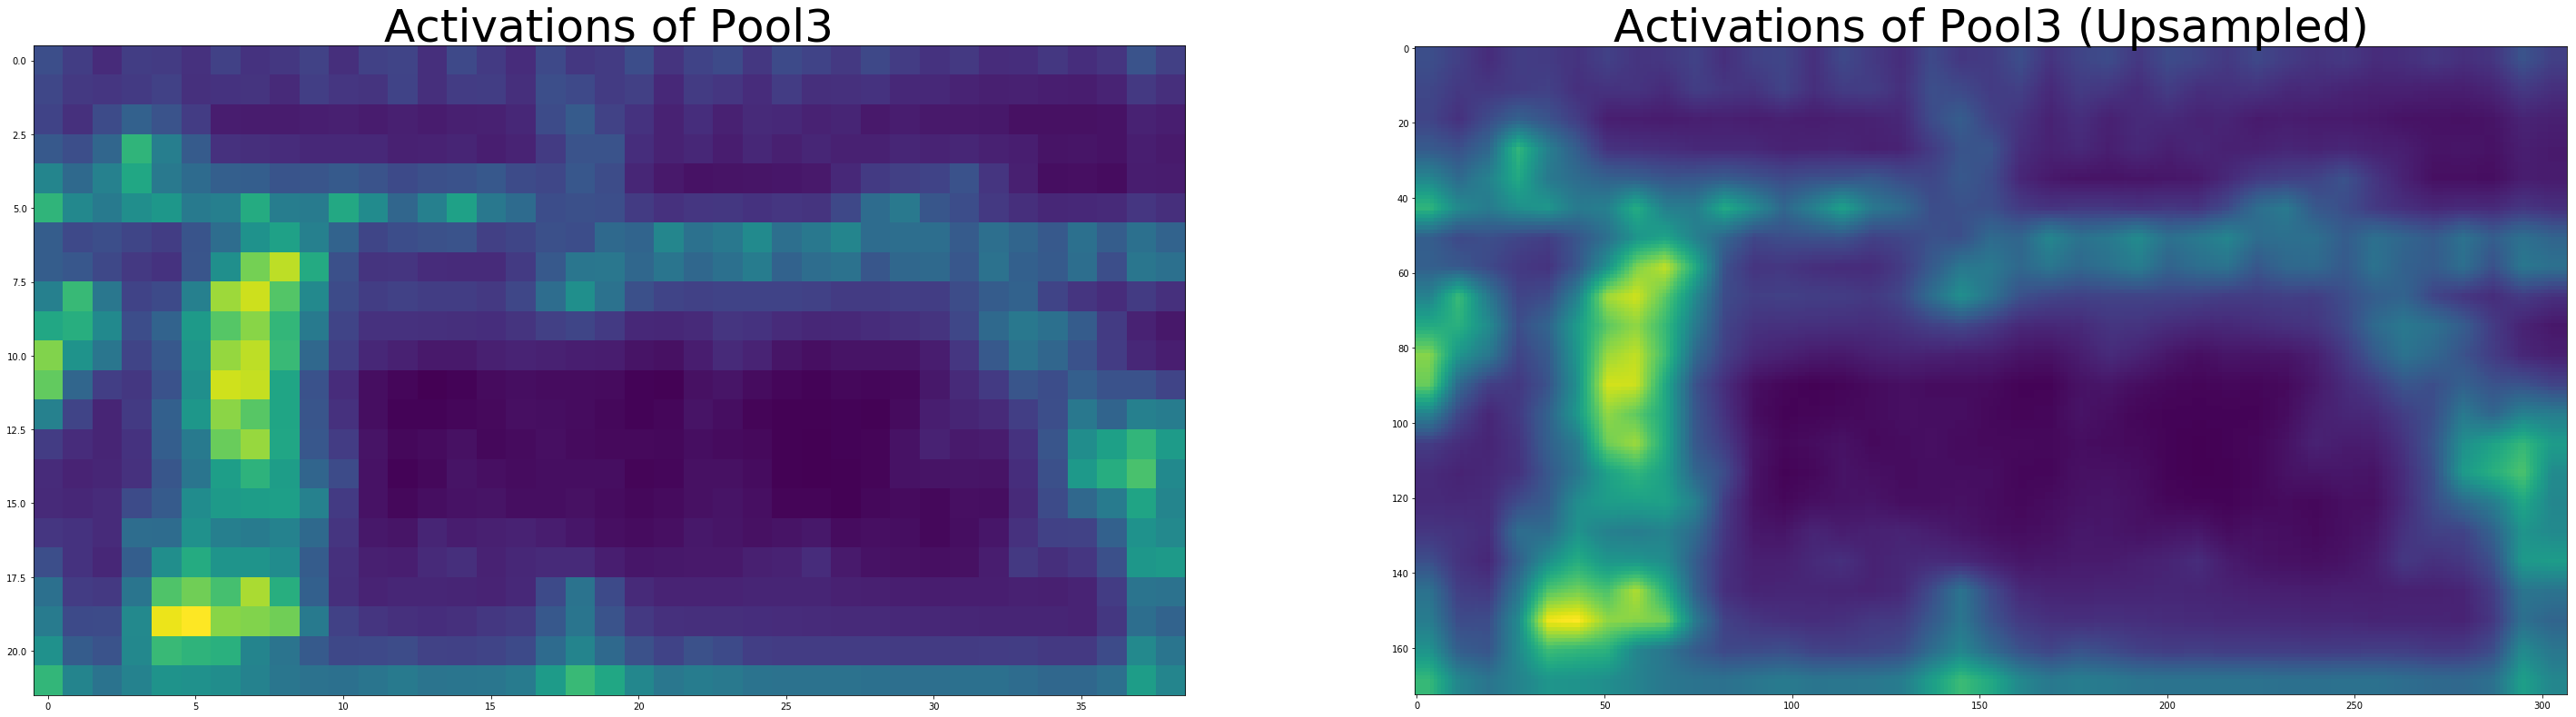

In [4]:
filters_p3 = p3.shape[3]
print("Shape of the activation is %dX%d" % (p3.shape[1],p3.shape[2]))
print("Number of the filters learned %d"%filters_p3)
plt.figure(1, figsize=(50,70))
sum_p3=0
for i in range(filters_p3):
    #plt.subplot(n_rows, n_columns, i + 1)
    #plt.title('Filter ' + str(i))
    #plt.imshow(p3[0, :, :, i], interpolation="nearest")
    sum_p3+=p3[0, :, :, i]/256
plt.subplot(1, 2, 1)
plt.title('Activations of Pool3',fontsize=50)
plt.imshow(sum_p3,interpolation='nearest') 
up3=scipy.misc.imresize(sum_p3,(173,307),'bilinear')
plt.subplot(1, 2, 2)
plt.title('Activations of Pool3 (Upsampled)',fontsize=50)
plt.imshow(up3,interpolation='nearest') 

Shape of the activation is 11X20
Number of the filters learned 512


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


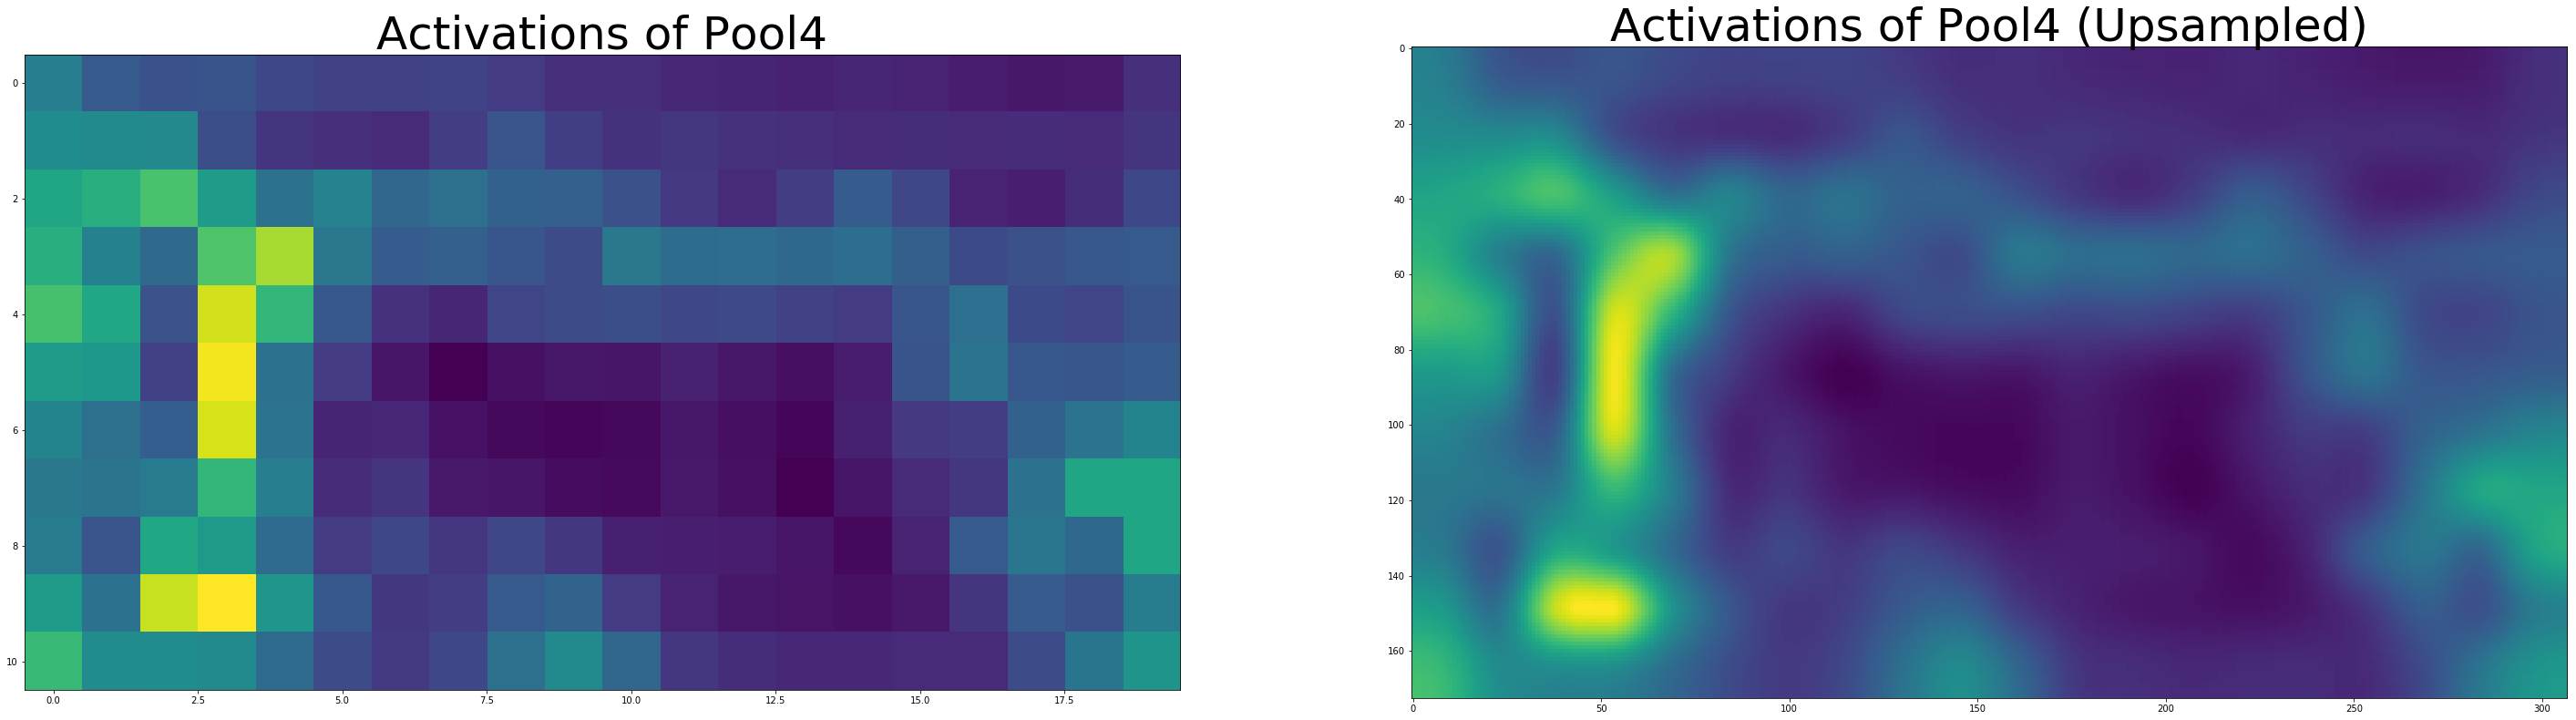

In [5]:
filters_p4 = p4.shape[3]
print("Shape of the activation is %dX%d" % (p4.shape[1],p4.shape[2]))
print("Number of the filters learned %d"%filters_p4)
plt.figure(1, figsize=(50,70))
sum_p4=0
for i in range(filters_p4):
    #plt.subplot(n_rows, n_columns, i + 1)
    #plt.title('Filter ' + str(i))
    #plt.imshow(p3[0, :, :, i], interpolation="nearest")
    sum_p4+=p4[0, :, :, i]/256
plt.subplot(1, 2, 1)
plt.title('Activations of Pool4',fontsize=50)
plt.imshow(sum_p4,interpolation='nearest') 
up4=scipy.misc.imresize(sum_p4,(173,307),'bicubic')
plt.subplot(1, 2, 2)
plt.title('Activations of Pool4 (Upsampled)',fontsize=50)
plt.imshow(up4,interpolation='nearest')

Shape of the activation is 6X10
Number of the filters learned 512


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


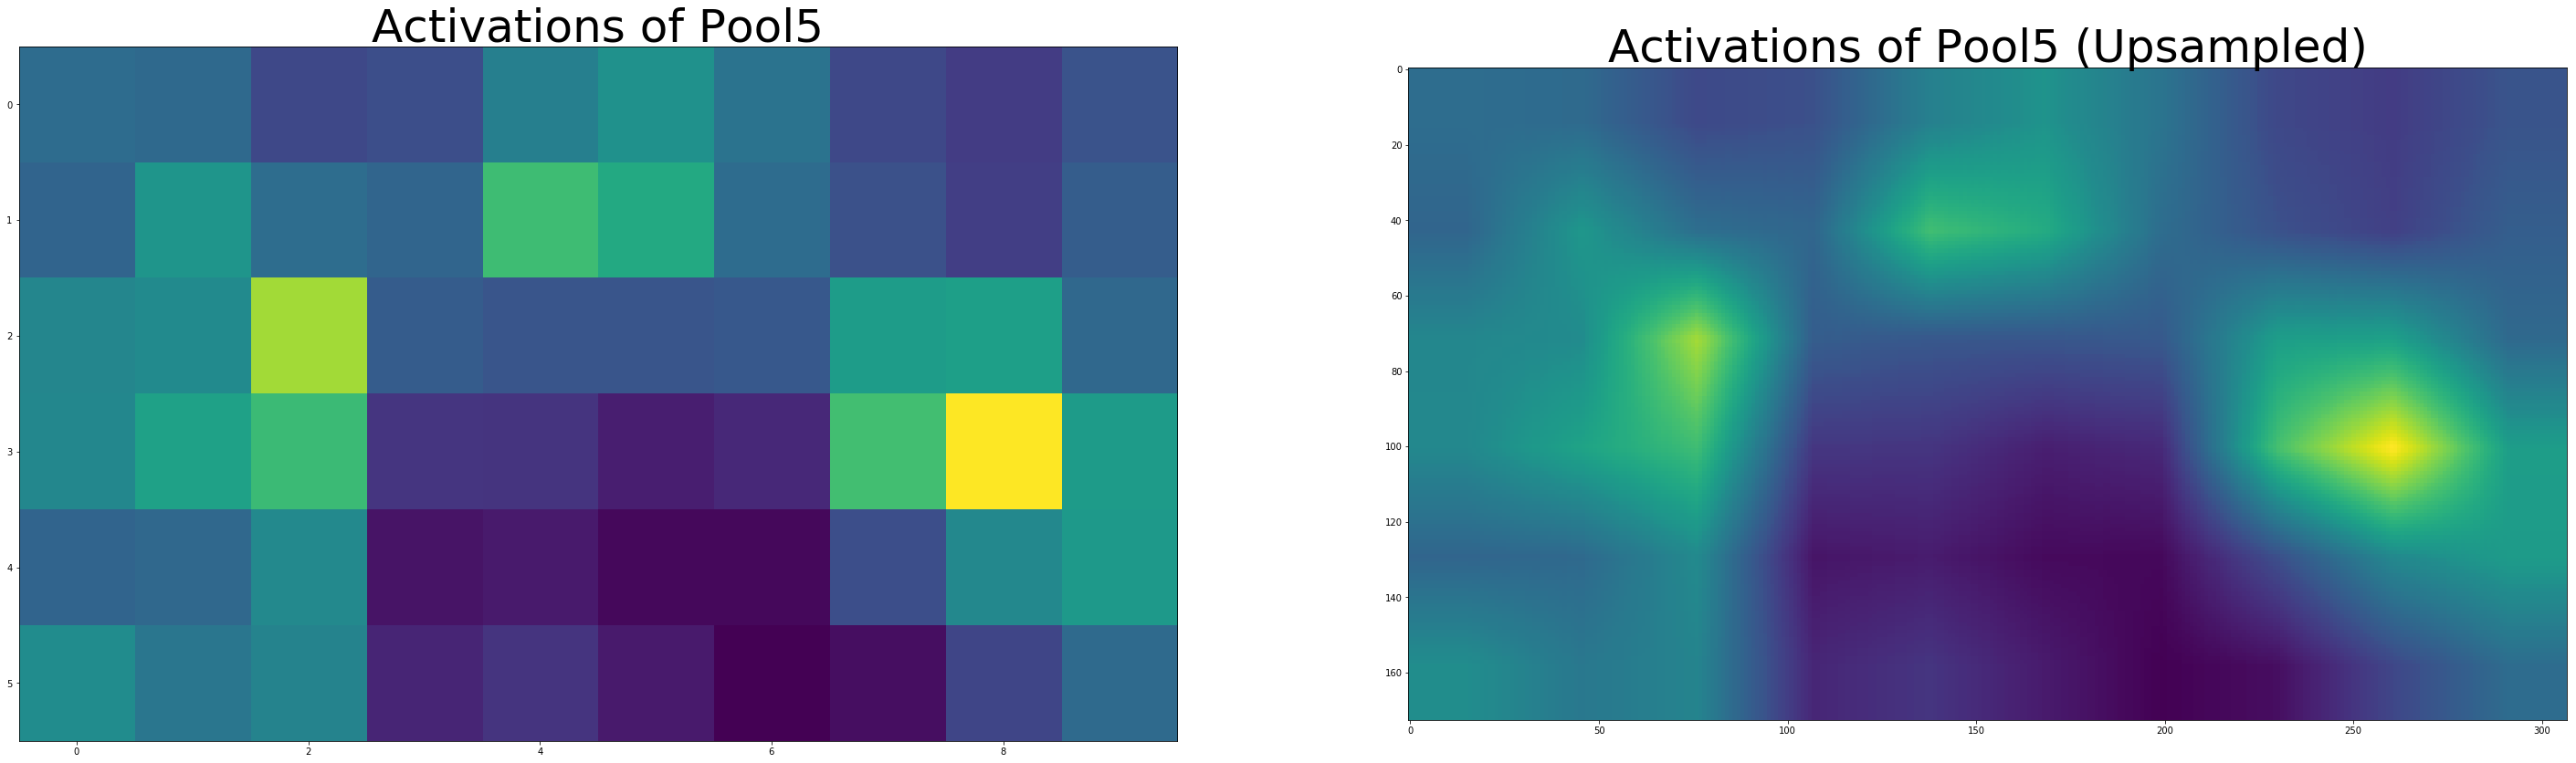

In [7]:
filters_p5 = p5.shape[3]
print("Shape of the activation is %dX%d" % (p5.shape[1],p5.shape[2]))
print("Number of the filters learned %d"%filters_p5)
plt.figure(1, figsize=(50,70))
sum_p5=0
for i in range(filters_p5):
    #plt.subplot(n_rows, n_columns, i + 1)
    #plt.title('Filter ' + str(i))
    #plt.imshow(p3[0, :, :, i], interpolation="nearest")
    sum_p5+=p5[0, :, :, i]/256
plt.subplot(1, 2, 1)
plt.title('Activations of Pool5',fontsize=50)
plt.imshow(sum_p5,interpolation='nearest') 
up5=scipy.misc.imresize(sum_p5,(173,307),'bilinear')
plt.subplot(1, 2, 2)
plt.title('Activations of Pool5 (Upsampled)',fontsize=50)
plt.imshow(up5,interpolation='nearest')

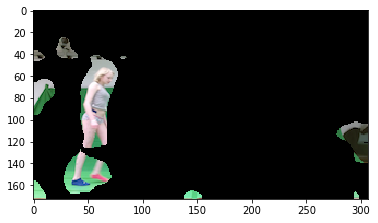

In [8]:
sum_act=(0.65*up3+0.3*up4+0.05*up5)
img1[sum_act<129]=0
plt.imshow(img1,interpolation='nearest')